<a href="https://www.kaggle.com/code/dsptlp/canada-age-pyramid-bargraph?scriptVersionId=169442781" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Canada Age Pyramid
- An age pyramid, also known as an age structure diagram or population pyramid, is a graphical representation of the age and sex distribution of a population. It typically consists of two bar graphs placed side by side, with the left side representing the male population and the right side representing the female population.

- The horizontal axis of the graph represents age groups, usually in five-year increments, while the vertical axis represents the percentage or absolute number of individuals in each age group. The bars on the graph show the distribution of population by age and sex, with the youngest age groups at the bottom and the oldest age groups at the top.

- Age pyramids are valuable tools for understanding population dynamics and demographic trends within a society. They can provide insights into birth rates, mortality rates, life expectancy, and population growth. By analyzing the shape of the pyramid, demographers and policymakers can make predictions about future population changes and plan for social, economic, and healthcare needs.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import math
import matplotlib.ticker as mtick
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Rectangle

In [2]:
def download_csv(url, destination):
    response = requests.get(url)
    with open(destination, 'wb') as file:
        file.write(response.content)

csv_url = 'https://www150.statcan.gc.ca/t1/tbl1/en/dtl!downloadDbLoadingData-nonTraduit.action?pid=9810002701&latestN=0&startDate=20210101&endDate=20210101&csvLocale=en&selectedMembers=%5B%5B1%5D%2C%5B%5D%2C%5B%5D%5D&checkedLevels=1D1%2C1D2%2C1D3%2C1D4%2C1D5%2C2D1%2C2D2'
destination_path = 'data_file.csv'

download_csv(csv_url, destination_path)

In [3]:
df = pd.read_csv(destination_path, encoding='utf-8')
df.head(5)

,REF_DATE,GEO,DGUID,"Age (in single years), average age and median age (128)",Gender (3),UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2021,Canada,2021A000011124,Total - Age,Total - Gender,NaN,0,units,0,NaN,1.1.1,36991980.0,NaN,NaN,NaN,0
1,2021,Canada,2021A000011124,Total - Age,Men+,NaN,0,units,0,NaN,1.1.2,18226235.0,NaN,NaN,NaN,0
2,2021,Canada,2021A000011124,Total - Age,Women+,NaN,0,units,0,NaN,1.1.3,18765745.0,NaN,NaN,NaN,0
3,2021,Canada,2021A000011124,0 to 14 years,Total - Gender,NaN,0,units,0,NaN,1.2.1,6012795.0,NaN,NaN,NaN,0
4,2021,Canada,2021A000011124,0 to 14 years,Men+,NaN,0,units,0,NaN,1.2.2,3086510.0,NaN,NaN,NaN,0


In [4]:
df = df[df['Age (in single years), average age and median age (128)'].str.isnumeric()]
df = df[df['Gender (3)'].isin(['Men+','Women+'])]
df = df.pivot(index='Age (in single years), average age and median age (128)', columns='Gender (3)', values='VALUE')
df = df.reset_index()

df['Age'] = df['Age (in single years), average age and median age (128)'].astype(int)

df['Men+'] = df['Men+'] / -1
df['Women+'] = df['Women+'] / 1

df = df.sort_values(by='Age', ascending=False)

df

Gender (3),"Age (in single years), average age and median age (128)",Men+,Women+,Age
98,99,-1280.0,4665.0,99
97,98,-1960.0,6590.0,98
96,97,-2935.0,9185.0,97
95,96,-4250.0,12075.0,96
94,95,-7240.0,18205.0,95
...,...,...,...,...
44,5,-205945.0,196155.0,5
33,4,-200440.0,189875.0,4
22,3,-193230.0,183800.0,3
11,2,-186855.0,178470.0,2


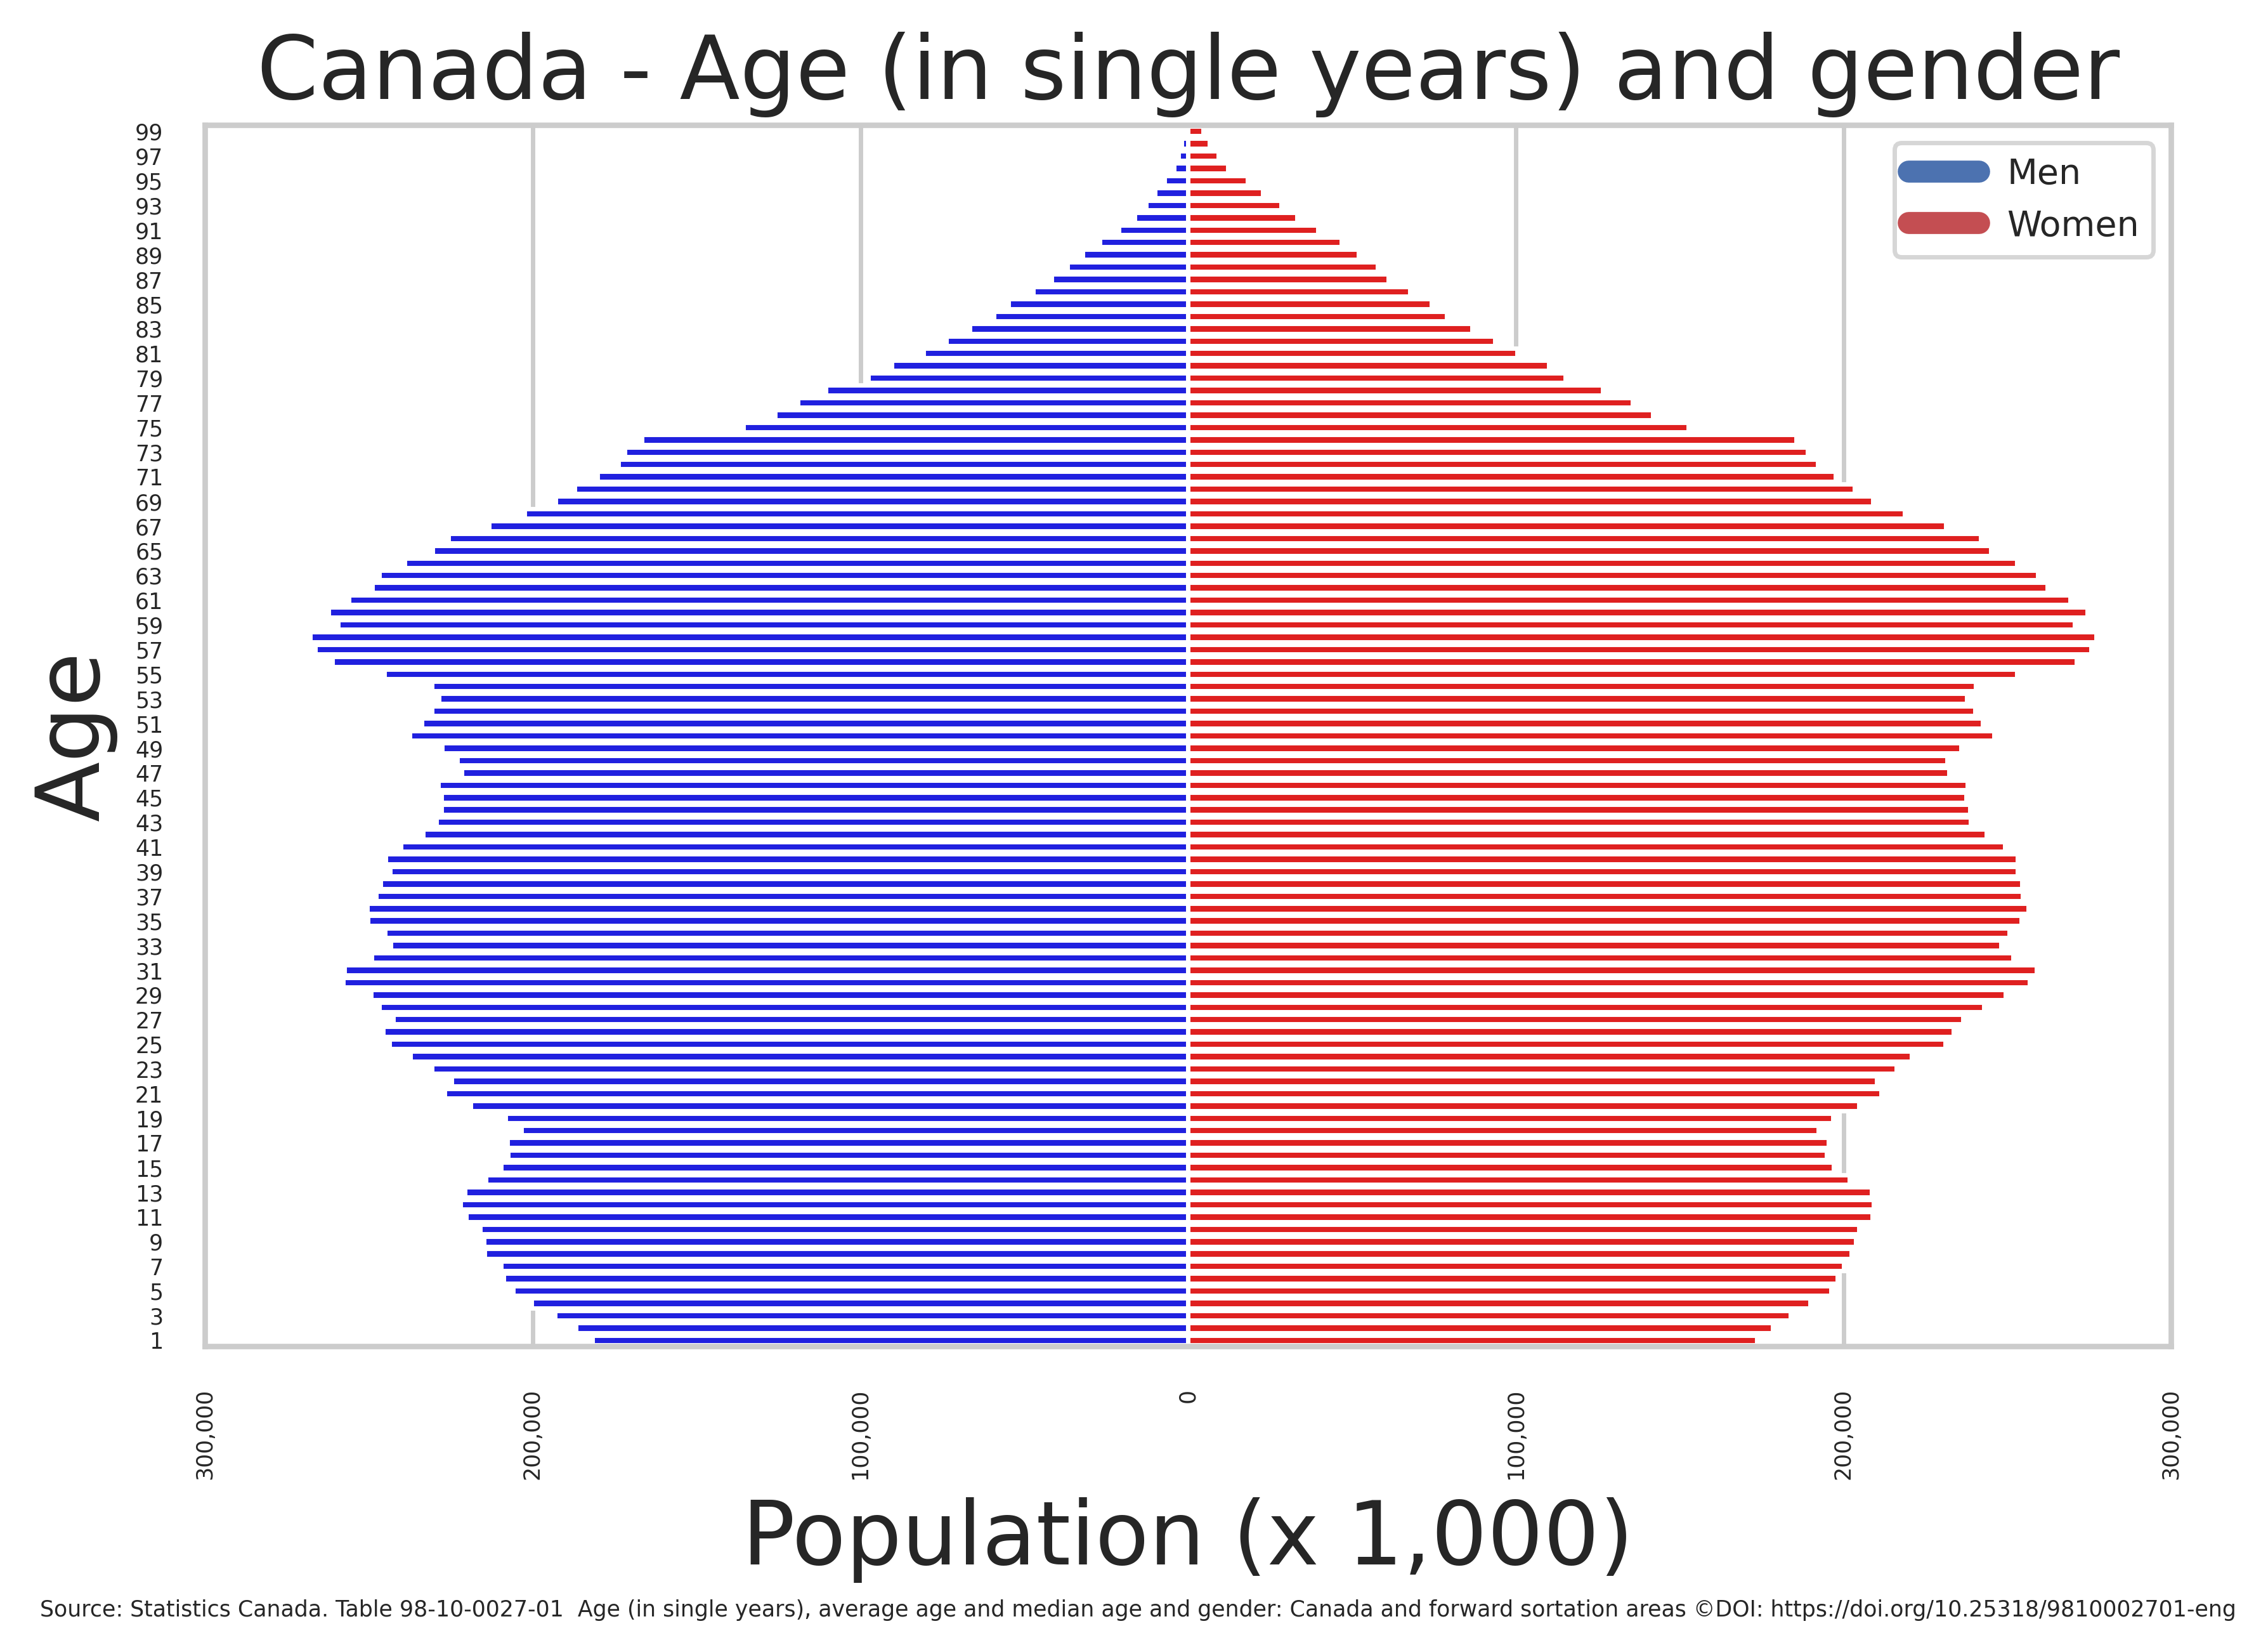

In [5]:
sns.set(style="whitegrid", font_scale=1)
sns.set_palette("pastel")  # Choose a light color palette

fig, ax = plt.subplots(1, 1, figsize = (8, 5), dpi=500, frameon =True)
ax.set_facecolor('white')  # Set a light background color

ax1 = sns.barplot(x='Men+', y='Age (in single years), average age and median age (128)', data=df, color="blue",)
ax2 = sns.barplot(x='Women+', y='Age (in single years), average age and median age (128)', data=df, color="red")

y_ticks = ax.get_yticks()[::2]
plt.yticks(y_ticks,rotation=0)

plt.xticks(rotation=90) 

ax.set_ylabel('Age', fontsize=20)    
ax.set_xlabel('Population (x 1,000)', fontsize=20)
ax.set_title('Canada - Age (in single years) and gender', fontsize=20)

ax.tick_params(axis='x', labelsize=5)
ax.tick_params(axis='y', labelsize=5)

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(abs(x))))

plt.xlim(-300000,300000)

legend_elements = [
    Line2D([0], [0], color='b', lw=5, label='Men'),
    Line2D([0], [0], color='r', lw=5, label='Women')
]

ax.legend(handles=legend_elements, loc='upper right', fontsize=8)


footnote_text = "Source: Statistics Canada. Table 98-10-0027-01  Age (in single years), average age and median age and gender: Canada and forward sortation areas ©DOI: https://doi.org/10.25318/9810002701-eng"
plt.figtext(0.06, -0.06, footnote_text, ha="left", fontsize=5, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))    

fig.savefig('age_pyramid.png',transparent=True,  bbox_inches='tight',pad_inches=0.15,dpi=400)